In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))  
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(SeuratData))

suppressMessages(suppressWarnings(addArchRGenome("hg19")))

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [2]:
suppressWarnings(SeuratData::InstallData("ifnb"))
suppressWarnings(SeuratData::LoadData("ifnb"))

An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [3]:
mat <- GetAssayData(ifnb, slot="counts")
colnames(mat) <- paste0(ifnb$stim, "#", colnames(mat))
rownames(ifnb@meta.data) <- colnames(mat)

In [4]:
proj <- suppressMessages(suppressWarnings(ArchRNA::Matrix2ArchRProject(mat=mat, name=c("CTRL", "STIM"), meta.data = ifnb@meta.data,outputDirectory = "ifnb", addHashtag = F)))

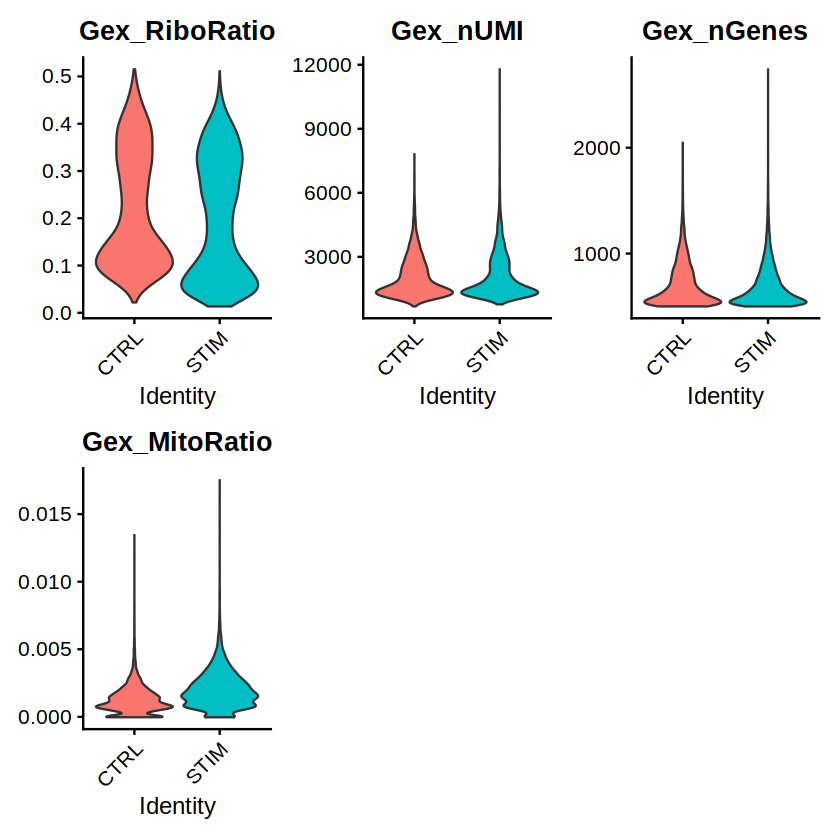

In [5]:
VlnPlotS(proj, features=c('Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_MitoRatio'), group.by="Sample", pt.size=0)

In [6]:
# cellcycling
proj <- suppressMessages(Cellcycling(proj))

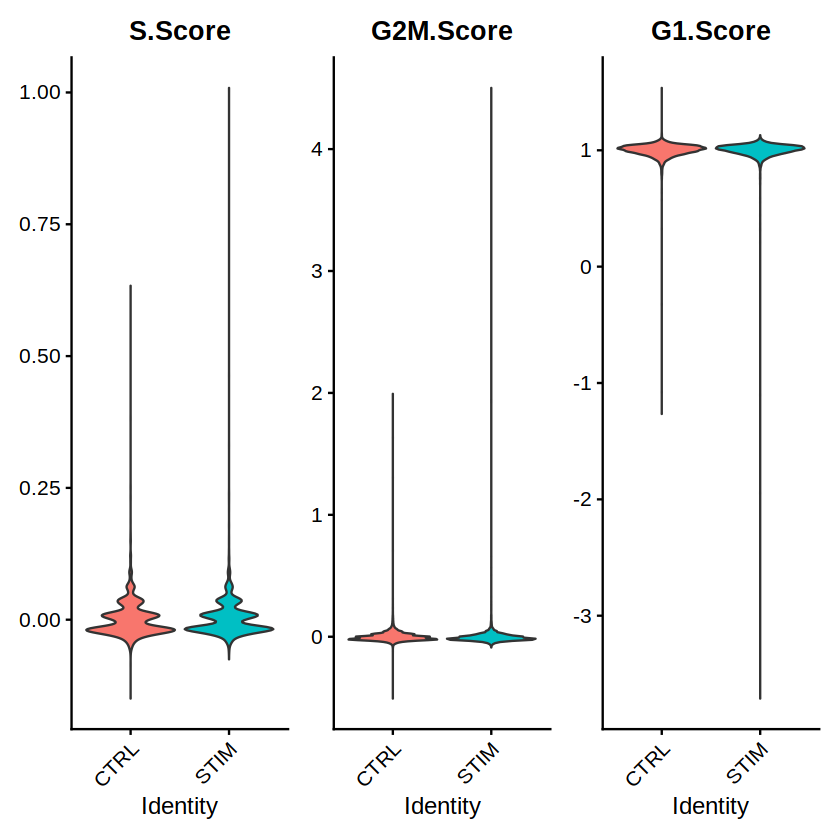

In [7]:
VlnPlotS(proj, features=c('S.Score', 'G2M.Score', 'G1.Score'), group.by="Sample", pt.size=0)

In [8]:
proj <- suppressMessages(addRNAIterativeLSI(proj))

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”


In [9]:
proj <- addHarmony(proj, reducedDims = "RNAIterativeLSI", groupBy = "Sample")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [10]:
proj <- addUMAP(proj, reducedDims = "Harmony", verbose = F, force = T) 

21:47:31 Creating temp model dir /tmp/Rtmp3R3dKR/dir28763d3c077b1e

21:47:31 Creating dir /tmp/Rtmp3R3dKR/dir28763d3c077b1e

21:47:32 Changing to /tmp/Rtmp3R3dKR/dir28763d3c077b1e

21:47:32 Creating /data/sz753404/git_code/ArchRNA/vignettes/ifnb/Embeddings/Save-Uwot-UMAP-Params-Harmony-28763d57c1ed70-Date-2022-11-01_Time-21-47-31.tar



In [ ]:
proj <- suppressMessages(addBatchClusters(proj, resolutions=seq(0.4, 0.8, by=0.1), cluster_prefix='Cluster_', reducedDims = "Harmony", biasCol = "Gex_nUMI"))

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)
suppressMessages(clustreeS(proj, prefix = "Cluster_"))

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)
##ArchR styple plots
proj$Clusters <- proj$Cluster_0.5
p1 <- suppressMessages(plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p1

In [ ]:
suppressMessages(scProportionPlotS(proj,condition="Sample", clusterName="Clusters", pair=c("STIM", "CTRL")))

In [ ]:
p2 <- suppressMessages(plotEmbedding(proj, name = "Sample", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p2 

In [ ]:
#Seurat style plots
options(repr.plot.width = 6, repr.plot.height = 5)
p3 <- DimPlotS(proj, group.by = "Clusters", reduction= "UMAP", label=T)
p3

In [ ]:
#Seurat style plots
options(repr.plot.width = 14, repr.plot.height = 6)
p4 <- suppressMessages(FeaturePlotS(proj, features=c("GNLY", "PPBP"), reduction= "UMAP", label=F, cols=c("lightgrey", "red")))
p4

In [ ]:
##convert to seurat-object
seu <- suppressMessages(ArchRNA:::PartialSeurat(proj, embeddings = "UMAP", assay = "data"))

In [ ]:
## Convert to Seurat Object
options(repr.plot.width = 7, repr.plot.height = 6)
Seurat::DimPlot(seu, reduction="UMAP", group.by="Sample")

In [ ]:
sessionInfo()